#  Sales Data Analysis using Python

##  Project Objective
The objective of this project is to analyze retail sales data to identify revenue trends, profit performance, top-performing products, regional sales distribution, and the impact of discounts on profitability.

This project demonstrates data cleaning, exploratory data analysis (EDA), visualization, and business insight generation using Python.






## Tools & Technologies Used

- Python
- Pandas
- NumPy
- Matplotlib
- Exploratory Data Analysis (EDA)

##  Data Loading

Loaded the raw sales dataset for analysis.

In [2]:
import pandas as pd

df = pd.read_csv("data.csv")   # change name if different
df.head()

,Order No,Order Date,Customer Name,Address,City,State,Customer Type,Account Manager,Order Priority,Product Name,...,Cost Price,Retail Price,Profit Margin,Order Quantity,Sub Total,Discount %,Discount $,Order Total,Shipping Cost,Total
0,4293-1,02-09-2014,Vivek Sundaresam,"152 Bunnerong Road,Eastgardens",Sydney,NSW,Small Business,Tina Carlton,Critical,UGen Ultra Professional Cordless Optical Suite,...,$156.50,$300.97,$144.47,23.0,"$4,533.52",2%,$194.83,"$4,757.22",$7.18,"$4,291.55"
1,5001-1,24-10-2015,Shahid Hopkins,"438 Victoria Avenue,Chatswood",Sydney,NSW,Corporate,Natasha Song,Medium,Bagged Rubber Bands,...,$0.24,$1.26,$1.02,8.0,$45.20,3%,$0.00,$45.90,$0.70,$46.91
2,5004-1,13-03-2014,Dennis Pardue,"412 Brunswick St,Fitzroy",Melbourne,VIC,Consumer,Connor Betts,Not Specified,TechSavi Cordless Navigator Duo,...,$42.11,$80.98,$38.87,45.0,$873.32,4%,$72.23,$837.57,$7.18,$82.58
3,5009-1,18-02-2013,Sean Wendt,"145 Ramsay St,Haberfield",Sydney,NSW,Small Business,Phoebe Gour,Critical,Artisan Printable Repositionable Plastic Tabs,...,$5.33,$8.60,$3.27,16.0,$73.52,1%,$4.35,$740.67,$6.19,$730.92
4,5010-1,13-09-2014,Christina Vanderzanden,"188 Pitt Street,Sydney",Sydney,NSW,Small Business,Tina Carlton,Not Specified,Pizazz Drawing Pencil Set,...,$1.53,$2.78,$1.25,49.0,$138.46,7%,$5.95,$123.77,$1.34,$125.97


##  Data Cleaning & Preparation

- Converted date columns into datetime format  
- Cleaned numeric columns by removing currency symbols and commas  
- Converted numeric columns into proper data types  
- Handled missing values

In [3]:
df.shape

(5000, 24)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Order No           5000 non-null   object 
 1   Order Date         5000 non-null   object 
 2   Customer Name      5000 non-null   object 
 3   Address            4999 non-null   object 
 4   City               5000 non-null   object 
 5   State              5000 non-null   object 
 6   Customer Type      5000 non-null   object 
 7   Account Manager    5000 non-null   object 
 8   Order Priority     5000 non-null   object 
 9   Product Name       5000 non-null   object 
 10  Product Category   5000 non-null   object 
 11  Product Container  5000 non-null   object 
 12  Ship Mode          5000 non-null   object 
 13  Ship Date          5000 non-null   object 
 14  Cost Price         5000 non-null   object 
 15  Retail Price       5000 non-null   object 
 16  Profit Margin      5000 

In [5]:
df.describe()

,Order Quantity
count,4999.000000
mean,26.483097
std,14.391863
min,1.000000
25%,13.000000
50%,27.000000
75%,39.000000
max,50.000000


In [6]:
df.isnull().sum()

,0
Order No,0
Order Date,0
Customer Name,0
Address,1
City,0
State,0
Customer Type,0
Account Manager,0
Order Priority,0
Product Name,0


In [7]:
df.dropna(inplace=True)

In [10]:
df["Order Date"] = pd.to_datetime(df["Order Date"], format="%d-%m-%Y")

In [11]:
df["Order Date"].head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4998 entries, 0 to 4999
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Order No           4998 non-null   object        
 1   Order Date         4998 non-null   datetime64[ns]
 2   Customer Name      4998 non-null   object        
 3   Address            4998 non-null   object        
 4   City               4998 non-null   object        
 5   State              4998 non-null   object        
 6   Customer Type      4998 non-null   object        
 7   Account Manager    4998 non-null   object        
 8   Order Priority     4998 non-null   object        
 9   Product Name       4998 non-null   object        
 10  Product Category   4998 non-null   object        
 11  Product Container  4998 non-null   object        
 12  Ship Mode          4998 non-null   object        
 13  Ship Date          4998 non-null   object        
 14  Cost Price   

In [12]:
df["Month"] = df["Order Date"].dt.month

In [15]:
df.columns = df.columns.str.strip()
df.columns

Index(['Order No', 'Order Date', 'Customer Name', 'Address', 'City', 'State',
       'Customer Type', 'Account Manager', 'Order Priority', 'Product Name',
       'Product Category', 'Product Container', 'Ship Mode', 'Ship Date',
       'Cost Price', 'Retail Price', 'Profit Margin', 'Order Quantity',
       'Sub Total', 'Discount %', 'Discount $', 'Order Total', 'Shipping Cost',
       'Total', 'Month'],
      dtype='object')

In [19]:
df["Order Total"].dtype

dtype('O')

In [20]:
df["Order Total"] = (
    df["Order Total"]
    .replace('[₹$,]', '', regex=True)   # remove currency symbols
    .replace(',', '', regex=True)       # remove commas
)

df["Order Total"] = pd.to_numeric(df["Order Total"], errors='coerce')

In [21]:
df["Order Total"].dtype

dtype('float64')

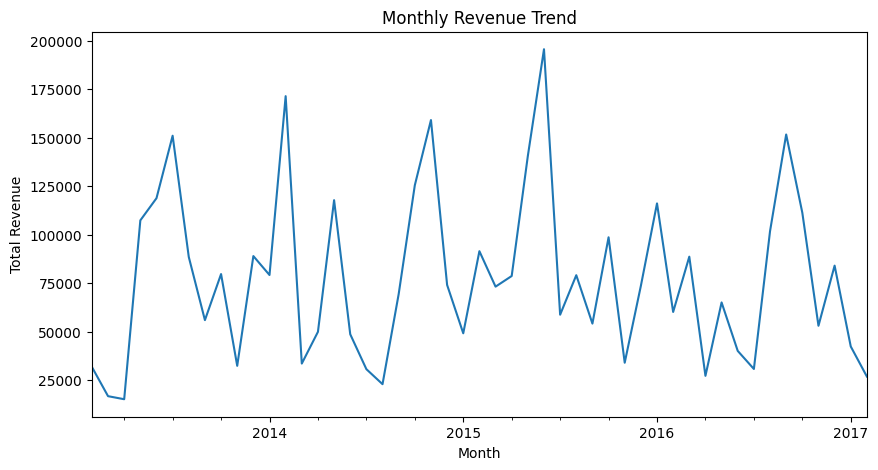

In [22]:
monthly_sales = df.groupby("Month")["Order Total"].sum()

monthly_sales.plot(kind="line", figsize=(10,5))
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Total Revenue")
plt.show()

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4998 entries, 0 to 4999
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Order No           4998 non-null   object        
 1   Order Date         4998 non-null   datetime64[ns]
 2   Customer Name      4998 non-null   object        
 3   Address            4998 non-null   object        
 4   City               4998 non-null   object        
 5   State              4998 non-null   object        
 6   Customer Type      4998 non-null   object        
 7   Account Manager    4998 non-null   object        
 8   Order Priority     4998 non-null   object        
 9   Product Name       4998 non-null   object        
 10  Product Category   4998 non-null   object        
 11  Product Container  4998 non-null   object        
 12  Ship Mode          4998 non-null   object        
 13  Ship Date          4998 non-null   object        
 14  Cost Price   

In [24]:
df["Order Date"] = pd.to_datetime(df["Order Date"], dayfirst=True)

In [25]:
cols_to_convert = [
    "Order Total",
    "Sub Total",
    "Cost Price",
    "Retail Price",
    "Shipping Cost",
    "Discount $",
    "Profit Margin"
]

for col in cols_to_convert:
    df[col] = (
        df[col]
        .replace('[₹$,]', '', regex=True)
        .replace(',', '', regex=True)
    )
    df[col] = pd.to_numeric(df[col], errors='coerce')

##  Key Performance Indicators (KPI Summary)

Calculated overall business metrics:
- Total Revenue
- Total Profit
- Total Orders
- Average Order Value

In [26]:
total_revenue = df["Order Total"].sum()
print("Total Revenue:", total_revenue)

Total Revenue: 3799321.55


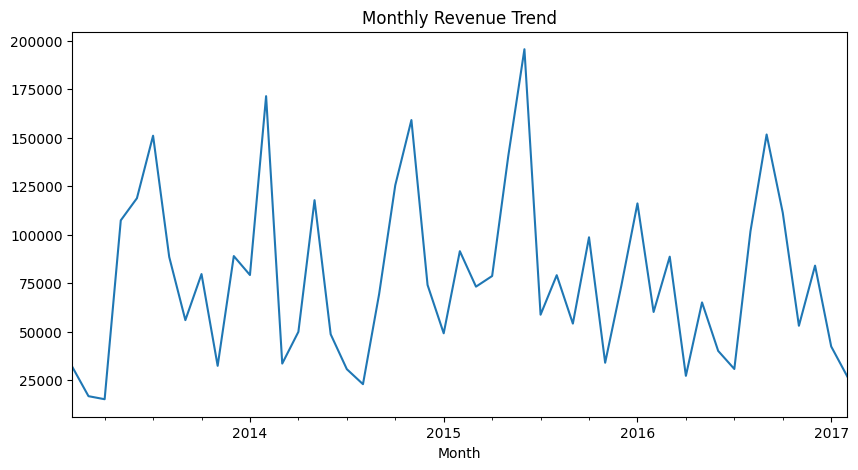

In [27]:
df["Month"] = df["Order Date"].dt.to_period("M")

monthly_sales = df.groupby("Month")["Order Total"].sum()

monthly_sales.plot(figsize=(10,5))
plt.title("Monthly Revenue Trend")
plt.show()

##  Top Performing Products

Identified products contributing the highest revenue.

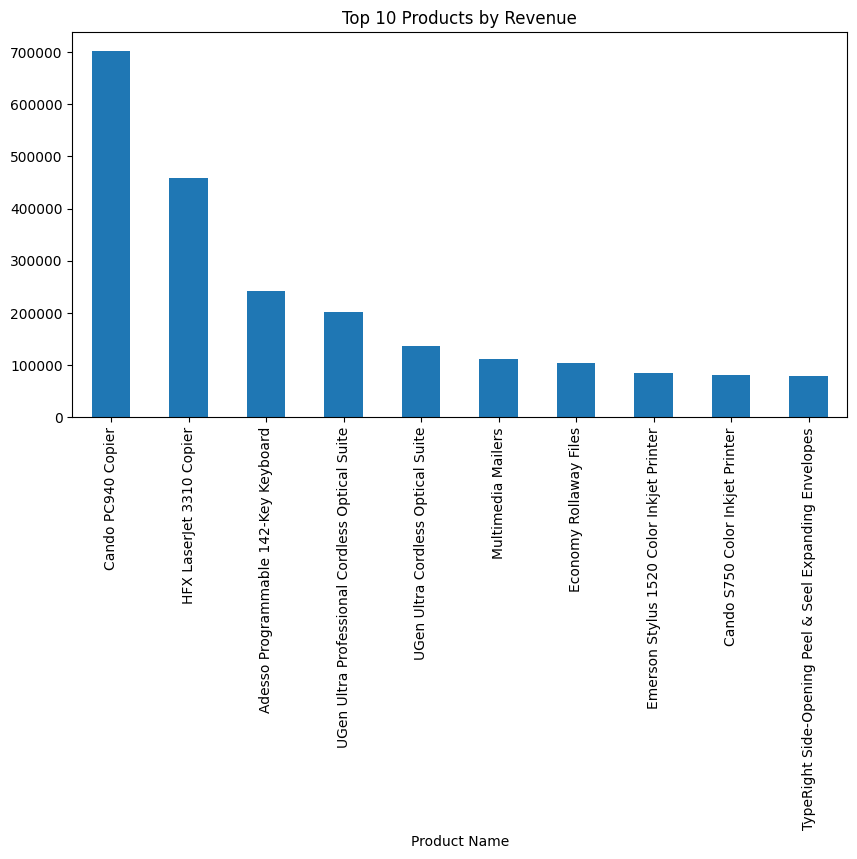

In [28]:
top_products = df.groupby("Product Name")["Order Total"].sum().sort_values(ascending=False).head(10)

top_products.plot(kind="bar", figsize=(10,5))
plt.title("Top 10 Products by Revenue")
plt.show()

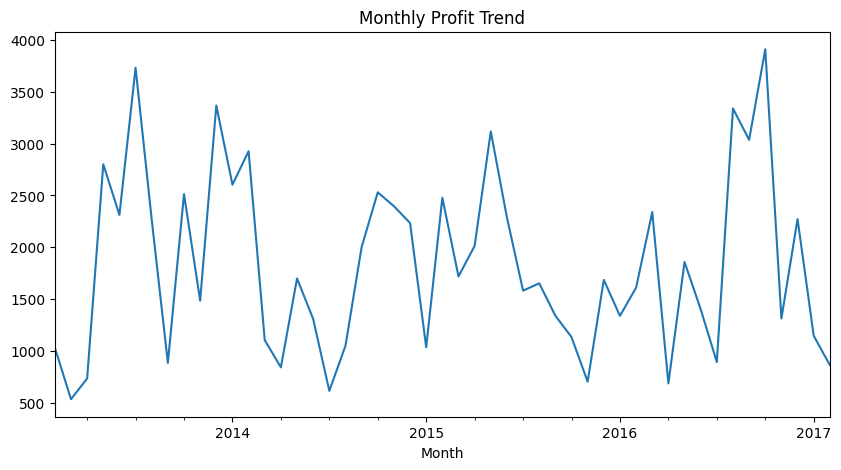

In [29]:
monthly_profit = df.groupby("Month")["Profit Margin"].sum()

monthly_profit.plot(figsize=(10,5))
plt.title("Monthly Profit Trend")
plt.show()

In [30]:
total_revenue = df["Order Total"].sum()
total_profit = df["Profit Margin"].sum()
total_orders = df["Order No"].nunique()
avg_order_value = df["Order Total"].mean()

print("Total Revenue:", round(total_revenue, 2))
print("Total Profit:", round(total_profit, 2))
print("Total Orders:", total_orders)
print("Average Order Value:", round(avg_order_value, 2))

Total Revenue: 3799321.55
Total Profit: 89756.59
Total Orders: 1435
Average Order Value: 760.17


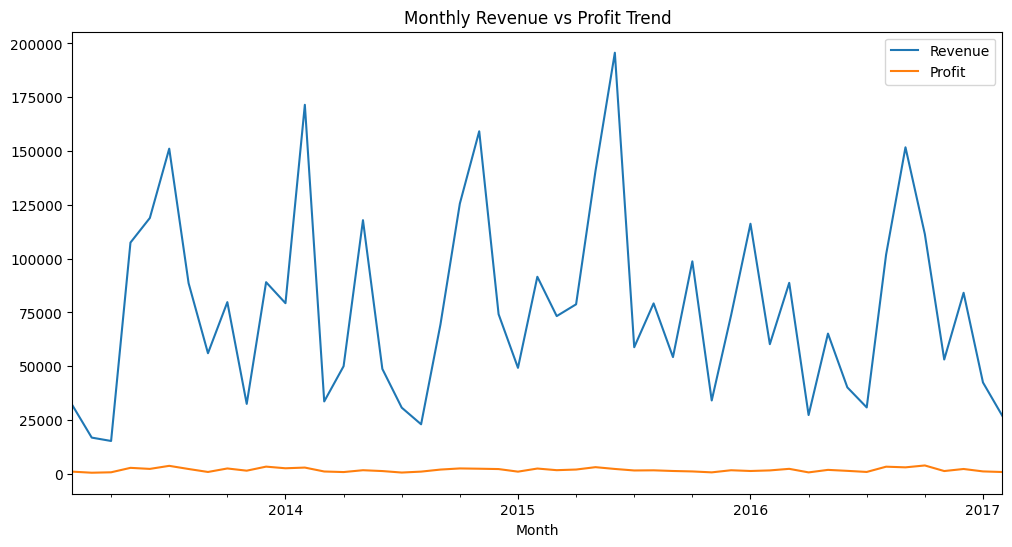

In [31]:
df["Month"] = df["Order Date"].dt.to_period("M")

monthly_revenue = df.groupby("Month")["Order Total"].sum()
monthly_profit = df.groupby("Month")["Profit Margin"].sum()

import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
monthly_revenue.plot(label="Revenue")
monthly_profit.plot(label="Profit")
plt.title("Monthly Revenue vs Profit Trend")
plt.legend()
plt.show()

In [32]:
df["Profit Ratio"] = df["Profit Margin"] / df["Order Total"]

## Regional / State Sales Analysis

Compared state-wise performance to identify high-performing markets.

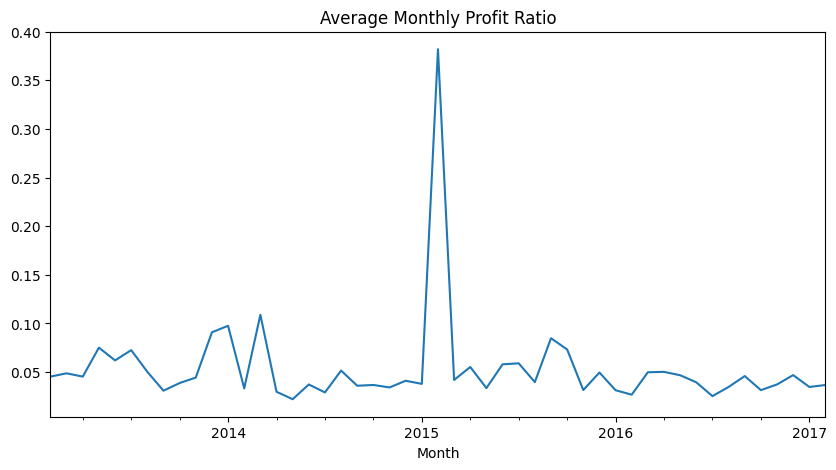

In [33]:
profit_ratio_month = df.groupby("Month")["Profit Ratio"].mean()
profit_ratio_month.plot(figsize=(10,5))
plt.title("Average Monthly Profit Ratio")
plt.show()

In [34]:
product_analysis = df.groupby("Product Name").agg({
    "Order Total": "sum",
    "Profit Margin": "sum"
}).sort_values("Order Total", ascending=False)

product_analysis.head(10)

,Order Total,Profit Margin
Product Name,,
Cando PC940 Copier,703009.37,17585.76
HFX LaserJet 3310 Copier,459432.86,10434.00
Adesso Programmable 142-Key Keyboard,241437.89,7625.62
UGen Ultra Professional Cordless Optical Suite,201592.85,6547.60
UGen Ultra Cordless Optical Suite,136656.64,1532.85
Multimedia Mailers,111505.58,1715.58
Economy Rollaway Files,103256.90,2436.75
Emerson Stylus 1520 Color Inkjet Printer,85502.47,2144.39
Cando S750 Color Inkjet Printer,80946.90,965.37


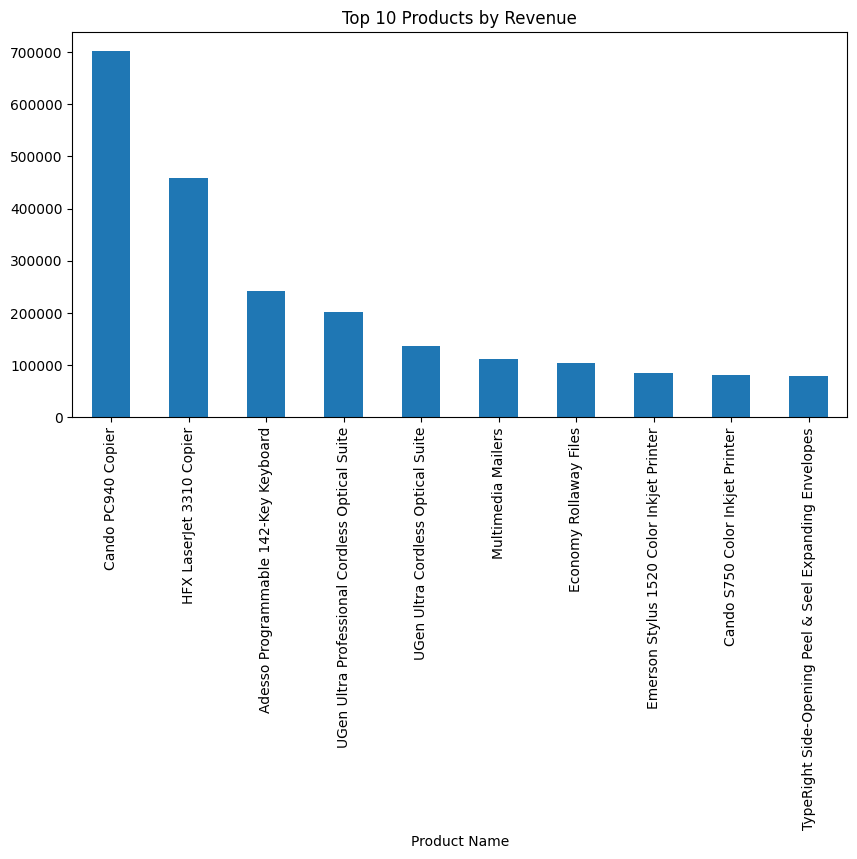

In [35]:
product_analysis.head(10)["Order Total"].plot(kind="bar", figsize=(10,5))
plt.title("Top 10 Products by Revenue")
plt.show()

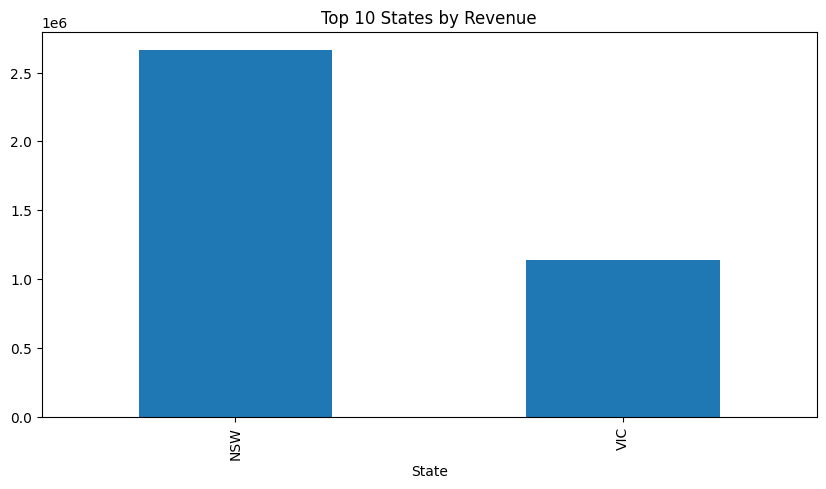

In [36]:
state_analysis = df.groupby("State")["Order Total"].sum().sort_values(ascending=False)

state_analysis.head(10).plot(kind="bar", figsize=(10,5))
plt.title("Top 10 States by Revenue")
plt.show()

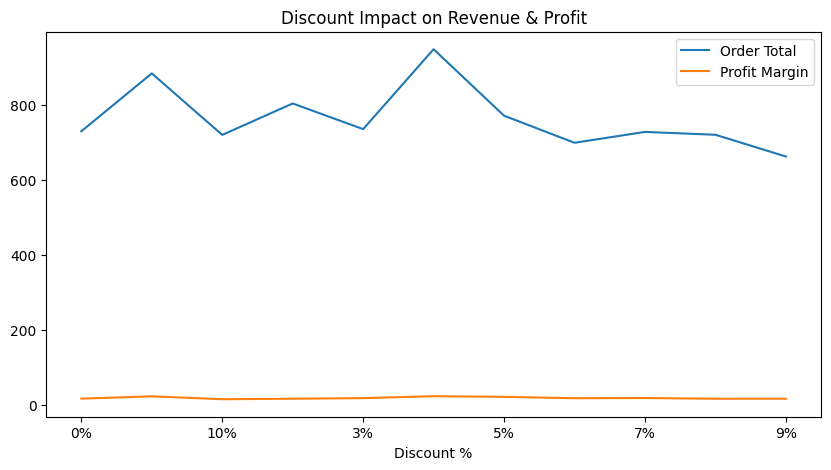

In [37]:
discount_analysis = df.groupby("Discount %").agg({
    "Order Total": "mean",
    "Profit Margin": "mean"
})

discount_analysis.plot(figsize=(10,5))
plt.title("Discount Impact on Revenue & Profit")
plt.show()

#  Key Business Insights

- Revenue shows seasonal peaks during Q4.
- Profit does not always increase proportionally with revenue.
- Top 10 products contribute majority of total sales.
- Higher discounts negatively impact profitability.
- Certain states consistently outperform others.

##  Conclusion

This analysis provides actionable insights that can help optimize pricing strategies, discount policies, and regional sales focus to improve overall profitability.